In [1]:
from sklearn.datasets import load_files       
from keras.utils import np_utils
import numpy as np
from glob import glob

# define function to load train, test, and validation datasets
def load_dataset(path):
    data = load_files(path)
    dog_files = np.array(data['filenames'])
    dog_targets = np_utils.to_categorical(np.array(data['target']-1), 6)
    return dog_files, dog_targets

# load train, test, and validation datasets
train_files, train_targets = load_dataset('Dataset/train')
valid_files, valid_targets = load_dataset('Dataset/test')
#test_files, test_targets = load_dataset('/data/dog_images/test')


Using TensorFlow backend.


In [29]:
from keras.preprocessing import image                  
from tqdm import tqdm

def path_to_tensor(img_path):
    # loads RGB image as PIL.Image.Image type
    img = image.load_img(img_path, target_size=(32, 32))
    # convert PIL.Image.Image type to 3D tensor with shape (224, 224, 3)
    x = image.img_to_array(img)
    # convert 3D tensor to 4D tensor with shape (1, 224, 224, 3) and return 4D tensor
    x = x.flatten()
    return np.expand_dims(x, axis=0)

def paths_to_tensor(img_paths):
    list_of_tensors = [path_to_tensor(img_path) for img_path in tqdm(img_paths)]
    return np.vstack(list_of_tensors)

In [30]:
array_names = ['Jack','Khaled','Mina','Mostafa','Nardeen','Shreif']

In [31]:
from PIL import ImageFile                            
ImageFile.LOAD_TRUNCATED_IMAGES = True                 

# pre-process the data for Keras
train_tensors = paths_to_tensor(train_files).astype('float32')/255

100%|██████████| 1240/1240 [00:00<00:00, 2026.90it/s]


In [32]:
valid_tensors = paths_to_tensor(valid_files).astype('float32')/255

100%|██████████| 304/304 [00:00<00:00, 1891.47it/s]


In [33]:
train_tensors.shape

(1240, 3072)

In [147]:
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
from keras.layers import Dropout, Flatten, Dense
from keras.models import Sequential
import keras


### TODO: Define your architecture.-
model = Sequential()
layer1 = model.add(Dense(100,activation='relu',input_shape=train_tensors[0].shape))
model.add(Dropout(0.3))
layer2 = model.add(Dense(100,activation='relu'))
model.add(Dropout(0.3))

layer3 = model.add(Dense(100,activation='relu'))
model.add(Dropout(0.3))


Dense = model.add(Dense(6,activation='softmax'))
model.summary()
opt = keras.optimizers.RMSprop()
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_134 (Dense)            (None, 100)               307300    
_________________________________________________________________
dropout_81 (Dropout)         (None, 100)               0         
_________________________________________________________________
dense_135 (Dense)            (None, 100)               10100     
_________________________________________________________________
dropout_82 (Dropout)         (None, 100)               0         
_________________________________________________________________
dense_136 (Dense)            (None, 100)               10100     
_________________________________________________________________
dropout_83 (Dropout)         (None, 100)               0         
_________________________________________________________________
dense_137 (Dense)            (None, 6)                 606       
Total para

In [148]:
from keras.callbacks import ModelCheckpoint  

### TODO: specify the number of epochs that you would like to use to train the model.

epochs = 100

### Do NOT modify the code below this line.

checkpointer = ModelCheckpoint(filepath='saved_models/weightsNN3.best.from_scratch.hdf5', 
                               verbose=1, save_best_only=True)

model.fit(train_tensors, train_targets, 
          validation_data=(valid_tensors, valid_targets),
          epochs=epochs, batch_size=20, callbacks=[checkpointer], verbose=1)

Train on 1240 samples, validate on 304 samples
Epoch 1/100
1240/1240 [==============================] - 3s 2ms/step - loss: 1.8018 - acc: 0.1952 - val_loss: 1.7083 - val_acc: 0.3914
Epoch 2/100
1240/1240 [==============================] - 1s 419us/step - loss: 1.7240 - acc: 0.2581 - val_loss: 1.6282 - val_acc: 0.4507
Epoch 3/100
1240/1240 [==============================] - 1s 451us/step - loss: 1.6661 - acc: 0.2992 - val_loss: 1.5449 - val_acc: 0.5757
Epoch 4/100
1240/1240 [==============================] - 1s 469us/step - loss: 1.5928 - acc: 0.3516 - val_loss: 1.4414 - val_acc: 0.5493
Epoch 5/100
1240/1240 [==============================] - 1s 460us/step - loss: 1.5350 - acc: 0.3597 - val_loss: 1.3526 - val_acc: 0.6020
Epoch 6/100
1240/1240 [==============================] - 1s 467us/step - loss: 1.4500 - acc: 0.4210 - val_loss: 1.2664 - val_acc: 0.6678
Epoch 7/100
1240/1240 [==============================] - 1s 454us/step - loss: 1.4126 - acc: 0.4403 - val_loss: 1.2037 - val_acc: 0.6

Epoch 27/100
1240/1240 [==============================] - 1s 456us/step - loss: 0.7814 - acc: 0.7218 - val_loss: 0.6834 - val_acc: 0.7664
Epoch 28/100
1240/1240 [==============================] - 1s 449us/step - loss: 0.7240 - acc: 0.7427 - val_loss: 0.7039 - val_acc: 0.7599
Epoch 29/100
1240/1240 [==============================] - 1s 462us/step - loss: 0.7214 - acc: 0.7524 - val_loss: 0.6828 - val_acc: 0.7730
Epoch 30/100
1240/1240 [==============================] - 1s 464us/step - loss: 0.7351 - acc: 0.7597 - val_loss: 0.6663 - val_acc: 0.7829
Epoch 31/100
1240/1240 [==============================] - 1s 458us/step - loss: 0.7235 - acc: 0.7613 - val_loss: 0.6561 - val_acc: 0.7895
Epoch 32/100
1240/1240 [==============================] - 1s 464us/step - loss: 0.6853 - acc: 0.7734 - val_loss: 0.6299 - val_acc: 0.7895
Epoch 33/100
1240/1240 [==============================] - 1s 449us/step - loss: 0.6795 - acc: 0.7790 - val_loss: 0.6313 - val_acc: 0.7862
Epoch 34/100
1240/1240 [==========

Epoch 57/100
1240/1240 [==============================] - 1s 451us/step - loss: 0.4482 - acc: 0.8419 - val_loss: 0.6089 - val_acc: 0.8191
Epoch 58/100
1240/1240 [==============================] - 1s 435us/step - loss: 0.4355 - acc: 0.8403 - val_loss: 0.6235 - val_acc: 0.8158
Epoch 59/100
1240/1240 [==============================] - 1s 441us/step - loss: 0.4553 - acc: 0.8524 - val_loss: 0.6201 - val_acc: 0.8125
Epoch 60/100
1240/1240 [==============================] - 1s 447us/step - loss: 0.4056 - acc: 0.8702 - val_loss: 0.6227 - val_acc: 0.8289
Epoch 61/100
1240/1240 [==============================] - 1s 445us/step - loss: 0.4273 - acc: 0.8645 - val_loss: 0.6792 - val_acc: 0.8059
Epoch 62/100
1240/1240 [==============================] - 1s 455us/step - loss: 0.4207 - acc: 0.8581 - val_loss: 0.6032 - val_acc: 0.8257
Epoch 63/100
1240/1240 [==============================] - 1s 444us/step - loss: 0.3913 - acc: 0.8694 - val_loss: 0.6857 - val_acc: 0.7993
Epoch 64/100
1240/1240 [==========

In [149]:
model.evaluate(valid_tensors,valid_targets,verbose=1)

304/304 [==============================] - 0s 120us/step


[0.75517124251315471, 0.82565789473684215]

In [70]:
model.evaluate(valid_tensors,valid_targets,verbose=1)

304/304 [==============================] - 0s 133us/step


[0.98051907514270986, 0.77302631578947367]

In [72]:
model.load_weights('saved_models/weightsNN3.best.from_scratch.hdf5')


In [71]:
def predicate_name(img_path):
#     img_path = 'testing/Khaled.jpg'
    predicted_vector = model.predict(path_to_tensor(img_path))
    return (img_path, predicted_vector)


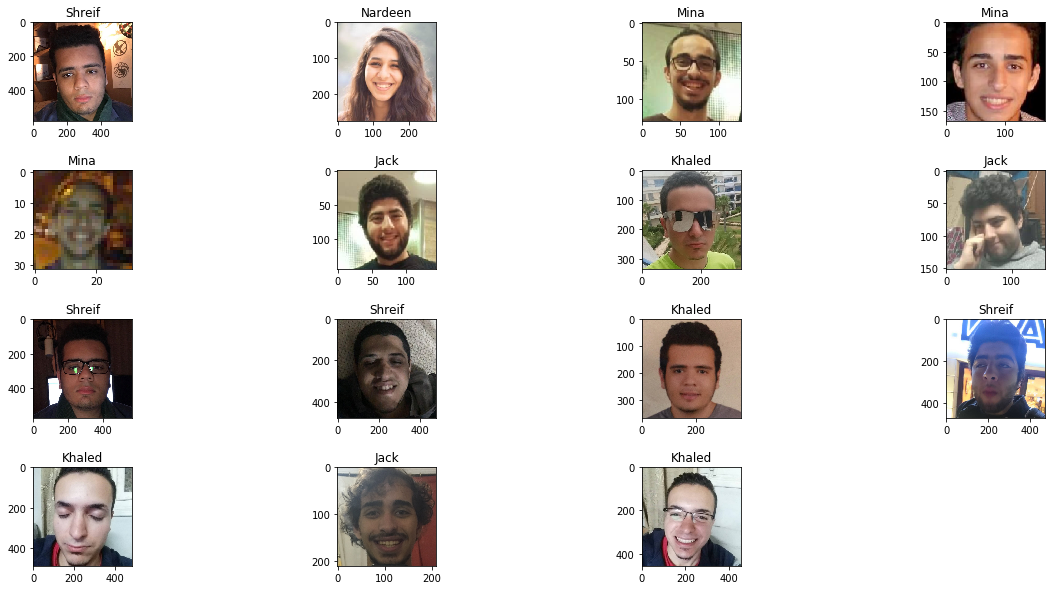

In [191]:
import os
import matplotlib.pyplot as plt
from PIL import Image

images = [predicate_name('predict/khaled/'+f) for f in os.listdir('predict/khaled')]
# fig=plt.figure(figsize=(4, 5))
# plt.figure(figsize=(20,10))
plt.figure(figsize=(20,10))
#fig.subplots_adjust()

columns = 4
rows = 5
for i, (img, pred) in enumerate(images):
    img = Image.open(img)
#     ax = fig.add_subplot(5, 4, i+1)
#     ax.imshow(img)
#     ax.set_title()
    plt.subplot(4, 4, i + 1)
    plt.subplots_adjust(hspace=0.5, wspace=0.5)
    plt.imshow(img)
    plt.title(array_names[np.argmax(pred)])
#plt.show()
